In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("/content/DS1_C9_S7_Project_AbsenteeismAtWork_Data.csv",sep=";")

In [6]:
# Create a binary target variable for high absenteeism
# Assuming "high absenteeism" as Absenteeism time > median (we'll use the median to classify "high" absenteeism)

# Calculate the median absenteeism time
median_absenteeism = df['Absenteeism time in hours' ].median()

# Create a binary column: 1 if absenteeism time > median, else 0
df['High Absenteeism'] = (df['Absenteeism time in hours'] > median_absenteeism).astype(int)

# Drop unnecessary columns
# Removing ID (identifier) and Absenteeism time in hours (since we now have 'High Absenteeism')
df_cleaned = df.drop(['ID', 'Absenteeism time in hours'], axis=1)

# Display the updated dataset with the new binary target variable
df_cleaned.head()


,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,High Absenteeism
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,1
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,0
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,1
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Separate features and target variable
X = df_cleaned.drop('High Absenteeism', axis=1)
y = df_cleaned['High Absenteeism']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

# Train Logistic Regression model
logreg.fit(X_train_scaled, y_train)

# Train KNN model
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate both models
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

logreg_report = classification_report(y_test, y_pred_logreg)
knn_report = classification_report(y_test, y_pred_knn)

logreg_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
knn_roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1])

logreg_accuracy, knn_accuracy, logreg_report, knn_report, logreg_roc_auc, knn_roc_auc


(0.7094594594594594,
 0.722972972972973,
 '              precision    recall  f1-score   support\n\n           0       0.75      0.69      0.72        80\n           1       0.67      0.74      0.70        68\n\n    accuracy                           0.71       148\n   macro avg       0.71      0.71      0.71       148\nweighted avg       0.71      0.71      0.71       148\n',
 '              precision    recall  f1-score   support\n\n           0       0.73      0.78      0.75        80\n           1       0.71      0.66      0.69        68\n\n    accuracy                           0.72       148\n   macro avg       0.72      0.72      0.72       148\nweighted avg       0.72      0.72      0.72       148\n',
 0.8039522058823529,
 0.7495404411764706)

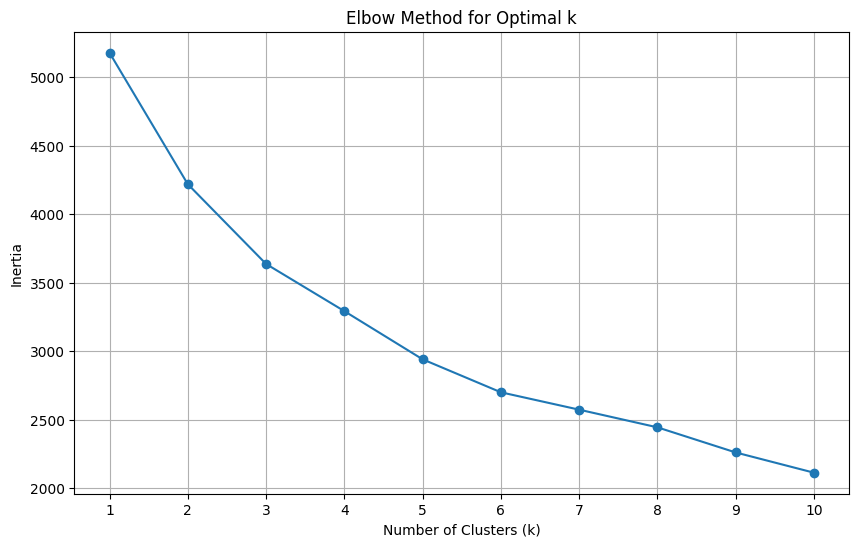

In [9]:
#tas2
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

#  relevant features for clustering
# We'll use: 'Reason for absence', 'Month of absence', 'Absenteeism time in hours', 'Service time', 'Transportation expense'
features_for_clustering = df[['Reason for absence', 'Service time', 'Transportation expense', 'Distance from Residence to Work', 'Age', 'Work load Average/day ', 'High Absenteeism']]

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_clustering)

# Use the Elbow Method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)  # Testing for 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()


In [10]:
# Assuming the optimal number of clusters is determined (let's say it's 4 for this example)
optimal_k = 4

# Fit the K-Means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Analyze the clusters
cluster_analysis = df.groupby('Cluster').mean()  # Mean of features in each cluster
print(cluster_analysis)

                ID  Reason for absence  Month of absence  Day of the week  \
Cluster                                                                     
0        16.986207            8.151724          6.400000         3.731034   
1         4.318182           23.445455          5.654545         3.972727   
2        23.431193           20.481651          6.302752         3.688073   
3        19.801498           22.449438          6.576779         4.176030   

          Seasons  Transportation expense  Distance from Residence to Work  \
Cluster                                                                      
0        2.793103              256.841379                        28.537931   
1        2.354545              184.000000                        50.863636   
2        2.467890              174.747706                        15.527523   
3        2.550562              255.456929                        32.992509   

         Service time        Age  Work load Average/day   ...  Educa

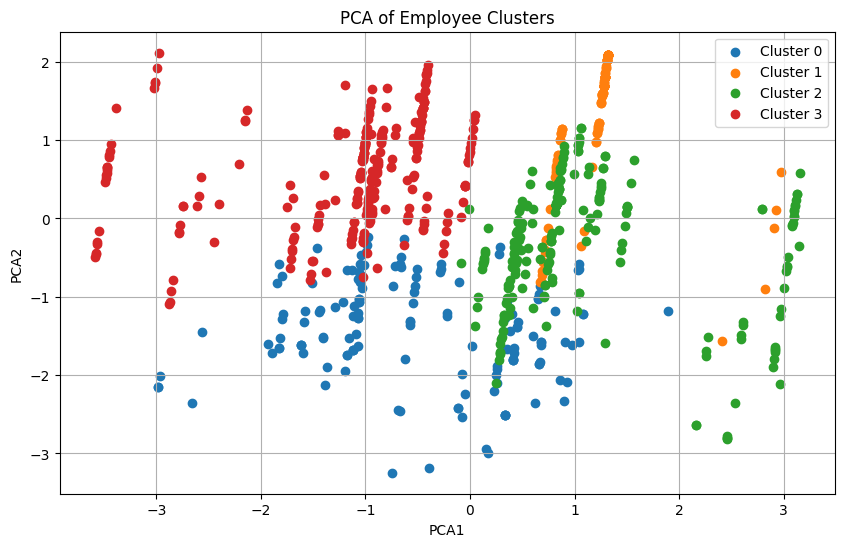

In [11]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
components = pca.fit_transform(features_scaled)

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data=components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df['Cluster']

# Plotting the PCA components colored by cluster
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    plt.scatter(pca_df[pca_df['Cluster'] == cluster]['PCA1'],
                pca_df[pca_df['Cluster'] == cluster]['PCA2'],
                label=f'Cluster {cluster}')
plt.title('PCA of Employee Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid()
plt.show()


In [14]:
# Assuming 'Churn' is a binary column indicating employee churn (1 for churned, 0 for active)
churn_analysis = df.groupby('Cluster')['Churn'].mean()  # Average churn rate per cluster
print(churn_analysis)

# Visualize churn rates by cluster
churn_analysis.plot(kind='bar', figsize=(10, 6), title='Churn Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Churn Rate')
plt.grid()
plt.show()


KeyError: 'Column not found: Churn'